In [1]:
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

In [2]:
# Read image
img = Image.open('barbara.jpg')

# Take only the first channel
img_array = np.asanyarray(img)[:,:,0]

## Spectral Analysis

In [3]:
# Computes the 2-dimensional discrete Fourier Transform
f_transform = np.fft.fft2(img_array)

# Shifts the zero-frequency component to the center of the spectrum
f_transform_shift = np.fft.fftshift(f_transform)

# Computes the magnitude of the 2-dimensional discrete Fourier Transform
magnitude_spectrum = np.log(np.abs(f_transform_shift))

# Computes the phase of the 2-dimensional discrete Fourier Transform
phase_spectrum = np.angle(f_transform_shift)

(Text(0.5, 1.0, 'Phase Spectrum'), ([], []), ([], []))

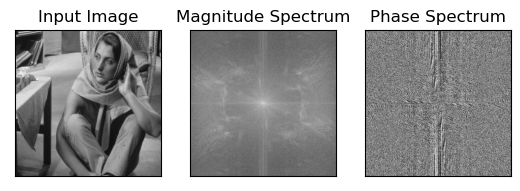

In [4]:
# Display the results
plt.subplot(131), plt.imshow(img_array, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(phase_spectrum, cmap='gray')
plt.title('Phase Spectrum'), plt.xticks([]), plt.yticks([])


(Text(0.5, 1.0, 'Reconstructed Image'), ([], []), ([], []))

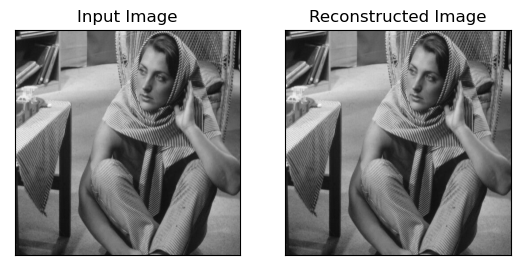

In [5]:
# Reconstruct the image
f_transform_shift = np.fft.ifftshift(f_transform_shift)

# Computes the inverse of the 2-dimensional discrete Fourier Transform
img_reconstruct = np.fft.ifft2(f_transform_shift)

# Display the results
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(np.abs(img_reconstruct), cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Reconstructed Image'), ([], []), ([], []))

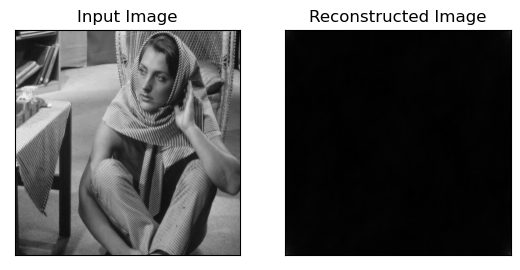

In [6]:
# Now removing the phase information
f_transform_shift = np.abs(f_transform_shift)

# Computes the inverse of the 2-dimensional discrete Fourier Transform
img_reconstruct = np.fft.ifft2(f_transform_shift)

# Display the results
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(np.abs(img_reconstruct), cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Reconstructed Image'), ([], []), ([], []))

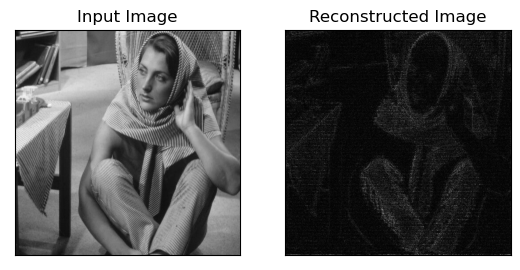

In [7]:
# Now removing the magnitude information
f_transform_shift = np.exp(1j*phase_spectrum)

# Computes the inverse of the 2-dimensional discrete Fourier Transform
img_reconstruct = np.fft.ifft2(f_transform_shift)

# Display the results
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(np.abs(img_reconstruct), cmap='gray')
plt.title('Reconstructed Image'), plt.xticks([]), plt.yticks([])

## Resizing the image

### With subsampling

In [8]:
SCALE = 2

In [9]:
new_img_array = np.zeros((int(img_array.shape[0]//np.sqrt(SCALE)), int(img_array.shape[1]//np.sqrt(SCALE)), 3), dtype=np.uint8)
new_img_array_2 = np.zeros((int(img_array.shape[0]//np.sqrt(SCALE)), int(img_array.shape[1]//np.sqrt(SCALE)), 3), dtype=np.uint8)

In [10]:
new_img_array = np.zeros((int(img_array.shape[0]//np.sqrt(SCALE)), int(img_array.shape[1]//np.sqrt(SCALE)), 3), dtype=np.uint8)

## This was the original code, but I asked ChatGPT to optimize it in a vectorized way

# for i in range(new_img_array.shape[0]):
#     for j in range(new_img_array.shape[1]):
#         new_img_array[i][j] = img_array[int(i*np.sqrt(SCALE))][int(j*np.sqrt(SCALE))]


# Create coordinate arrays for the new image
i_indices, j_indices = np.indices(new_img_array.shape[:2])

# Scale the coordinates for the original image
i_indices_scaled = (i_indices * np.sqrt(SCALE)).astype(int)
j_indices_scaled = (j_indices * np.sqrt(SCALE)).astype(int)

# Use the scaled coordinates to map from the original image to the new one
new_img_array = img_array[i_indices_scaled, j_indices_scaled]

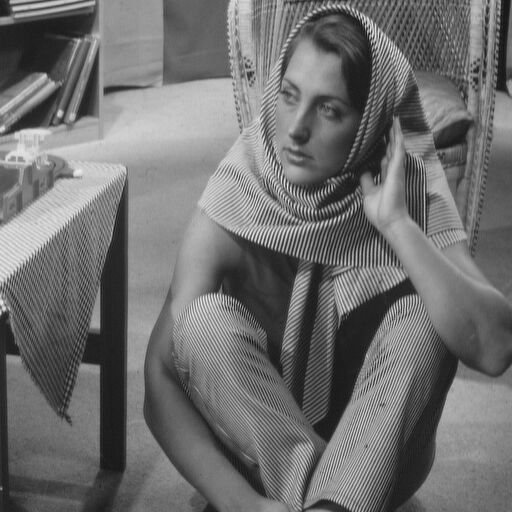

In [11]:
img

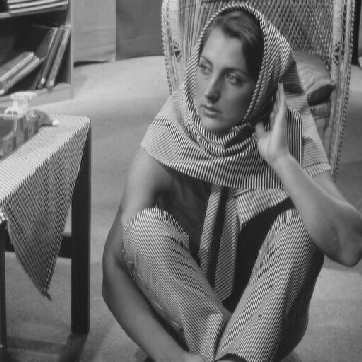

In [12]:
Image.fromarray(new_img_array)

### On the Fourier domain

In [13]:
SCALE = 4

In [15]:
f_transform = np.fft.fft2(img_array)
f_transform_shift = np.fft.fftshift(f_transform)

center_row, center_col = img_array.shape[0]//2, img_array.shape[1]//2

In [20]:
new_transform = f_transform_shift[center_row - int(center_row//np.sqrt(SCALE)):center_row + int(center_row//np.sqrt(SCALE)),
     center_col - int(center_col//np.sqrt(SCALE)):center_col + int(center_col//np.sqrt(SCALE))]

In [21]:
new_transform = np.fft.ifftshift(new_transform)

In [22]:
f_transform_i = np.fft.ifft2(new_transform)
f_transform_i = np.abs(f_transform_i)

Text(0.5, 1.0, 'Resized Image')

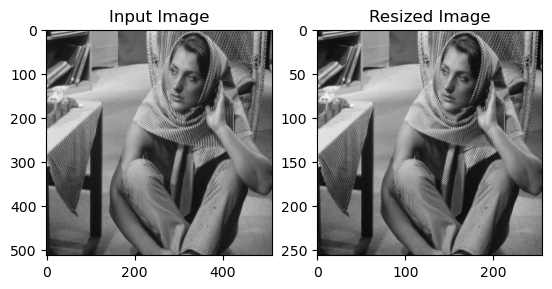

In [23]:
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image')

plt.subplot(122), plt.imshow(f_transform_i, cmap='gray')
plt.title('Resized Image')

## Supersampling the image

### Using zero-padding in Fourier domain

In [76]:
SCALE = 100

In [77]:
f_transform = np.fft.fft2(img_array)
f_transform_shift = np.fft.fftshift(f_transform)

img_array.shape[0], img_array.shape[1] = int(img_array.shape[0]*np.sqrt(SCALE)), int(img_array.shape[1]*np.sqrt(SCALE))
center_row, center_col = img_array.shape[0]//2, img_array.shape[1]//2

In [78]:
padded_transform = np.zeros((img_array.shape[0], img_array.shape[1]), dtype=np.complex64)
padded_transform[center_row - img_array.shape[0]//2:center_row + img_array.shape[0]//2,
     center_col - img_array.shape[1]//2:center_col + img_array.shape[1]//2] = f_transform_shift

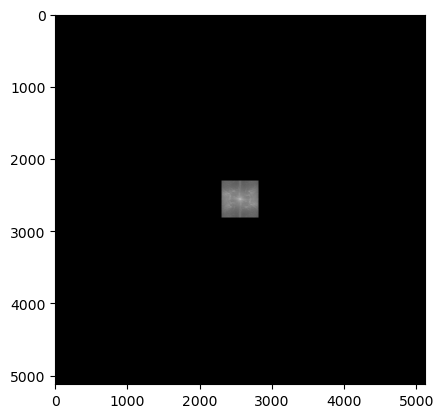

In [79]:
plt.imshow(np.log(np.abs(padded_transform)+1), cmap='gray')

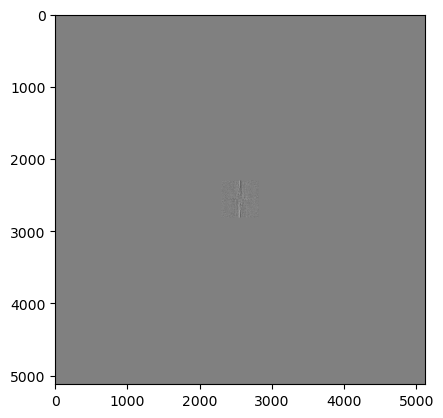

In [80]:
plt.imshow(np.angle(padded_transform), cmap='gray')

In [81]:
padded_transform = np.fft.ifftshift(padded_transform)

padded_img = np.fft.ifft2(padded_transform)
padded_img = np.abs(padded_img)

Text(0.5, 1.0, 'Padded Image')

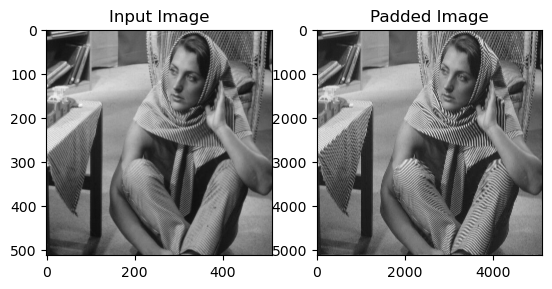

In [82]:
# Display the results
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image')

plt.subplot(122), plt.imshow(padded_img, cmap='gray')
plt.title('Padded Image')

### Linear interpolation in space domain

In [120]:
SCALE = 2

In [121]:
new_img_array = np.zeros((int(img_array.shape[0]*np.sqrt(SCALE)), int(img_array.shape[1]*np.sqrt(SCALE))))

In [122]:
center_row, center_col = new_img_array.shape[0]//2, new_img_array.shape[1]//2

In [123]:
# Create a grid of coordinates in the original image
x, y = np.meshgrid(np.linspace(0, img_array.shape[0] - 1, int(img_array.shape[0]*np.sqrt(SCALE))), np.linspace(0, img_array.shape[1] - 1, int(img_array.shape[1]*np.sqrt(SCALE))))

# Calculate the x and y indices in the original image
x_floor, x_ceil = np.floor(x).astype(int), np.ceil(x).astype(int)
y_floor, y_ceil = np.floor(y).astype(int), np.ceil(y).astype(int)

# Limit indices to within the image boundary
x_floor = np.clip(x_floor, 0, img_array.shape[0] - 1)
x_ceil = np.clip(x_ceil, 0, img_array.shape[0] - 1)
y_floor = np.clip(y_floor, 0, img_array.shape[1] - 1)
y_ceil = np.clip(y_ceil, 0, img_array.shape[1] - 1)

# Calculate the ratios
dx, dy = x - x_floor, y - y_floor

# Perform bilinear interpolation
interpolated_image = (1 - dx) * (1 - dy) * img_array[y_floor, x_floor] + \
                        dx * (1 - dy) * img_array[y_floor, x_ceil] + \
                        (1 - dx) * dy * img_array[y_ceil, x_floor] + \
                        dx * dy * img_array[y_ceil, x_ceil]

Text(0.5, 1.0, 'Interpolated Image')

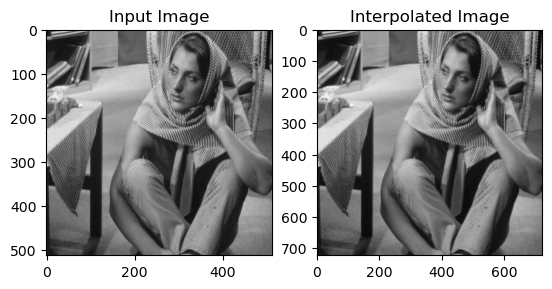

In [124]:
# Display the results
plt.subplot(121), plt.imshow(img_array, cmap='gray')
plt.title('Input Image')

plt.subplot(122), plt.imshow(interpolated_image, cmap='gray')
plt.title('Interpolated Image')